In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ckd.csv')
df.head()

,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,0,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,3,68,80,1.010,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [3]:
df.columns

Index(['Unnamed: 0', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cell', 'Pus Cell clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Class'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      158 non-null    int64  
 1   Blood Pressure           158 non-null    int64  
 2   Specific Gravity         158 non-null    float64
 3   Albumin                  158 non-null    int64  
 4   Sugar                    158 non-null    int64  
 5   Red Blood Cells          158 non-null    object 
 6   Pus Cell                 158 non-null    object 
 7   Pus Cell clumps          158 non-null    object 
 8   Bacteria                 158 non-null    object 
 9   Blood Glucose Random     158 non-null    int64  
 10  Blood Urea               158 non-null    int64  
 11  Serum Creatinine         158 non-null    float64
 12  Sodium                   158 non-null    int64  
 13  Potassium                158 non-null    float64
 14  Hemoglobin               1

In [8]:
df.isnull().sum()

Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
x = df[['Hemoglobin','Blood Glucose Random','Sugar']]
y = df['Class']

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
y = le.fit_transform(y)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [17]:
rmse_val = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)

Text(0, 0.5, 'Root Mean Squared Error')

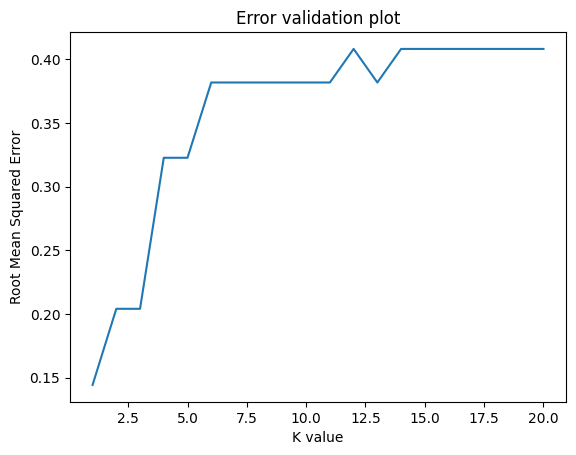

In [18]:
plt.title("Error validation plot")
plt.plot(range(1,21),rmse_val)
plt.xlabel("K value")
plt.ylabel("Root Mean Squared Error")

In [19]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy Score is {accuracy_score(y_test,y_pred)}")

Accuracy Score is 0.9583333333333334


In [20]:
alice = pd.DataFrame({'Hemoglobin':[0],'Blood Glucose Random':[df['Blood Glucose Random'].mean()+(1.1*df['Blood Glucose Random'].std())],'Sugar':[df['Sugar'].mean()+(1.1*df['Sugar'].std())]})
alice

,Hemoglobin,Blood Glucose Random,Sugar
0,0,202.775588,1.147901


In [21]:
pred = knn.predict(alice)
pred

array([1], dtype=int64)

In [22]:
if pred==1:
    print("Alice has CKD")
else:
    print("Alice does not have CKD")

Alice has CKD


In [23]:
df2 = pd.read_csv("breast-cancer.csv")

In [24]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df2.shape

(569, 33)

In [26]:
df2.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [27]:
df2.drop('Unnamed: 32',axis=1,inplace=True)

In [28]:
df2.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df2.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [31]:
y = df2['diagnosis']
x = df2.drop('diagnosis',axis=1)

In [32]:
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
lr

LogisticRegression()

In [36]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc = accuracy_score(y_pred,y_test)
print("Accuracy score is ",acc)

Accuracy score is  0.631578947368421


In [37]:
from sklearn.tree import DecisionTreeClassifier as DT
dt = DT()

In [38]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
acc = accuracy_score(y_pred,y_test)
print("Accuracy score is ",acc)

Accuracy score is  0.9532163742690059


[Text(0.625, 0.9375, 'x[8] <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.4318181818181818, 0.8125, 'x[21] <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.3181818181818182, 0.6875, 'x[11] <= 0.626\ngini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.22727272727272727, 0.5625, 'x[25] <= 0.178\ngini = 0.026\nsamples = 227\nvalue = [224, 3]'),
 Text(0.18181818181818182, 0.4375, 'x[15] <= 0.003\ngini = 0.018\nsamples = 226\nvalue = [224, 2]'),
 Text(0.09090909090909091, 0.3125, 'x[22] <= 26.89\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.045454545454545456, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.13636363636363635, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2727272727272727, 0.3125, 'x[22] <= 33.35\ngini = 0.009\nsamples = 221\nvalue = [220, 1]'),
 Text(0.22727272727272727, 0.1875, 'gini = 0.0\nsamples = 208\nvalue = [208, 0]'),
 Text(0.3181818181818182, 0.1875, 'x[0] <= 886852.0\ngini = 0.142\nsample

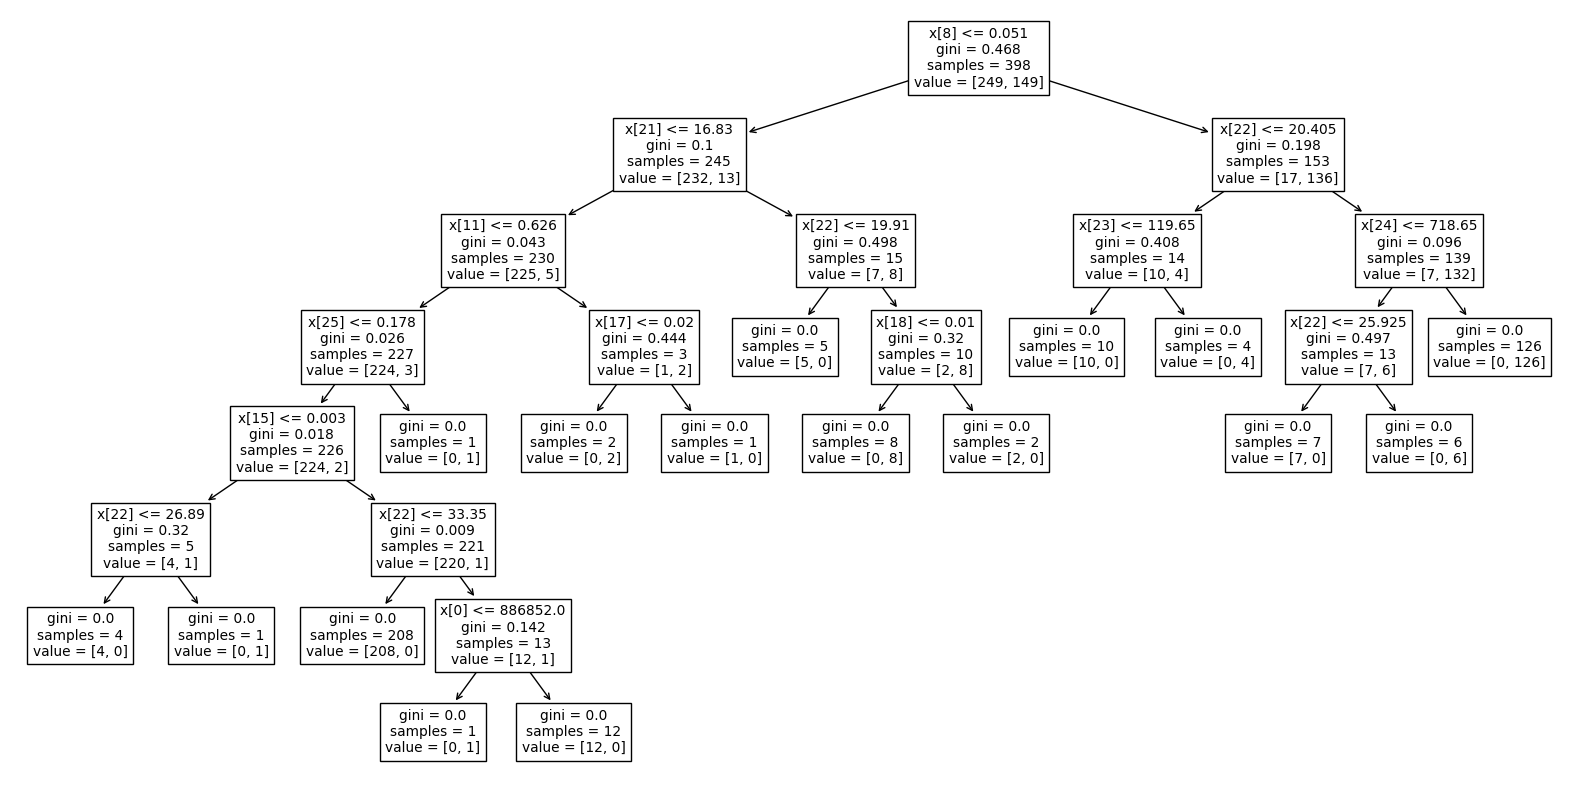

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt)

In [40]:
from sklearn.svm import SVC

svm = SVC()

In [41]:
svm

SVC()

In [42]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
acc = accuracy_score(y_pred,y_test)
print("Accuracy score is ",acc)

Accuracy score is  0.631578947368421


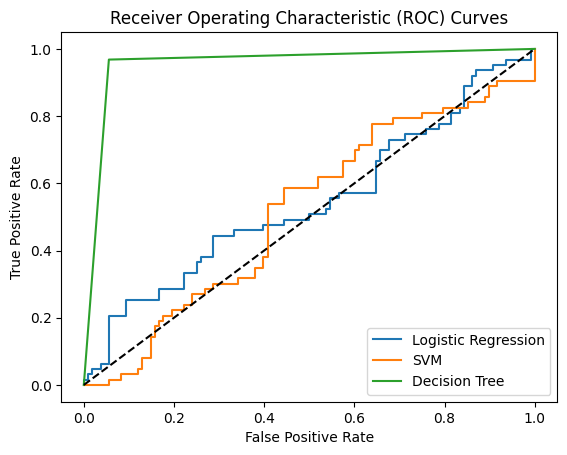

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
lr_probs = lr.predict_proba(x_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# SVM
svm_probs = svm.decision_function(x_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# Decision Tree
dt_probs = dt.predict_proba(x_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Plotting the ROC curves
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


In [44]:
# Calculate AUC for each method
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# Print the AUC values
print("AUC for Logistic Regression:", lr_auc)
print("AUC for SVM:", svm_auc)
print("AUC for Decision Tree:", dt_auc)


AUC for Logistic Regression: 0.5446796002351557
AUC for SVM: 0.518371546149324
AUC for Decision Tree: 0.9563492063492064


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("house.csv")

In [47]:
df.head()

,crime_rate,pprime_land,Luxury,Rooms,age,Central_location,Highways,Tax_rate,poor_percentage,home_price
0,0.00632,2.31,0,6.575,65.2,4.0900,1,296,4.98,24.0
1,0.02731,7.07,0,6.421,78.9,4.9671,2,242,9.14,21.6
2,0.02729,7.07,0,7.185,61.1,4.9671,2,242,4.03,34.7
3,0.03237,2.18,0,6.998,45.8,6.0622,3,222,2.94,33.4
4,0.06905,2.18,0,7.147,54.2,6.0622,3,222,5.33,36.2


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [50]:
lr = LinearRegression()

In [51]:
lr

LinearRegression()

In [52]:
x = df.drop('home_price',axis=1)
y = df['home_price']
x = ss.fit_transform(x)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   crime_rate        506 non-null    float64
 1   pprime_land       506 non-null    float64
 2   Luxury            506 non-null    int64  
 3   Rooms             506 non-null    float64
 4   age               506 non-null    float64
 5   Central_location  506 non-null    float64
 6   Highways          506 non-null    int64  
 7   Tax_rate          506 non-null    int64  
 8   poor_percentage   506 non-null    float64
 9   home_price        506 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 39.7 KB


In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred = lr.predict(x_test)
acc = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is:", acc)

Mean Squared Error is: 26.887760274920574


In [58]:
from sklearn.metrics import r2_score

y_pred = lr.predict(x_test)

accuracy = r2_score(y_test, y_pred)
print("Accuracy (R-squared):", accuracy)

Accuracy (R-squared): 0.6391538954326355
